# The Best Neighbourhood in Pittsburgh
The goal of this project is to determine which Pittsburgh neighborhood can be considered as the **best**.

# Metric
We decided that the best Neighbourhood in Pittsburgh would most likely be the one thats the **safest**. This metric
will be based on three data sets provided by the WPRDC. One data
set recording weapon seizures that occured over the city of Pittsburgh, another recording criminal activity, and the
last one recording police arrests. In order to better narrow down and give better judgement in according to our topic,
we have established a few rules that will be applied as we evaluate the metric of our three data sets. **(1)** We will only
evaluate recording done from the year 2020 to the present in order to further relavent data with recency, all data recording
before the year 2020 will not be evaluated. **(2)** We will only be evaluating violent crimes that could be considered a threat to 
someone's safety or wellbeing, this includes homicide crimes, sexual crimes, robbery, and other similar offenses. Non violent
crimes such as shoplifting, petty theft, misdameanor drug use, and traffic violations will not be evaluated. 

In [2]:
import matplotlib.pyplot as plt
import pandas as pd 

# Criminal Activity 
![crime](https://media2.giphy.com/media/v1.Y2lkPTc5MGI3NjExdDgzYXlxMmJzcmxuMjMwa2x3ZmE5NzVnbG92c2J5bzY3dXo5YWdlOCZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/o2CbCvGN6qaUsHYu4F/giphy.gif)

## STEP 1
Lets load and preview the dataset

In [ ]:
crimes_df = pd.read_csv("criminalactivity.csv")
print('Preview of dataset:')
crimes_df.head(10)

## STEP 2- Handiling missing data and cleaning up columns.

Lets drop any rows that are missing a neighborhood value, remove extra spaces and standardize capitalization. 

In [ ]:
crimes_df.isnull().sum()
crimes_df = crimes_df.dropna(subset=['Neighborhood'])
vio_crimes = [
    "Assault Offenses",
    "Robbery",
    "Homicide Offenses",
    "Kidnapping/Abduction",
    "Sex Offenses",
    "Arson"
]

crimes_df = crimes_df[crimes_df['NIBRS_Offense_Category'].isin(vio_crimes)]
crimes_df['Neighborhood'] = crimes_df['Neighborhood'].str.strip().str.title()
crimes_df.head()

## STEP 3-Counting crimes by neighbourhood
Let's count how many times each neighborhood appears in the dataset.

In [ ]:
crime_by_neighborhood = crimes_df['Neighborhood'].value_counts().reset_index()
crime_by_neighborhood.columns = ['Neighborhood', 'Crime_Count']
crime_by_neighborhood = crime_by_neighborhood.sort_values(by='Crime_Count', ascending=True)
crime_by_neighborhood.head(10)

## STEP 4-Identifying the Neighbourhood with the least Crimes.

In [6]:
safest = crime_by_neighborhood.iloc[0]

print("The safest neighborhood in Pittsburgh is:",
      safest['Neighborhood'],
      "with only",
      safest['Crime_Count'],
      "violent crimes recorded.")

The safest neighborhood in Pittsburgh is: Ridgemont with only 3 violent crimes recorded.


## STEP 5-FINALLY LETS VISUALIZE

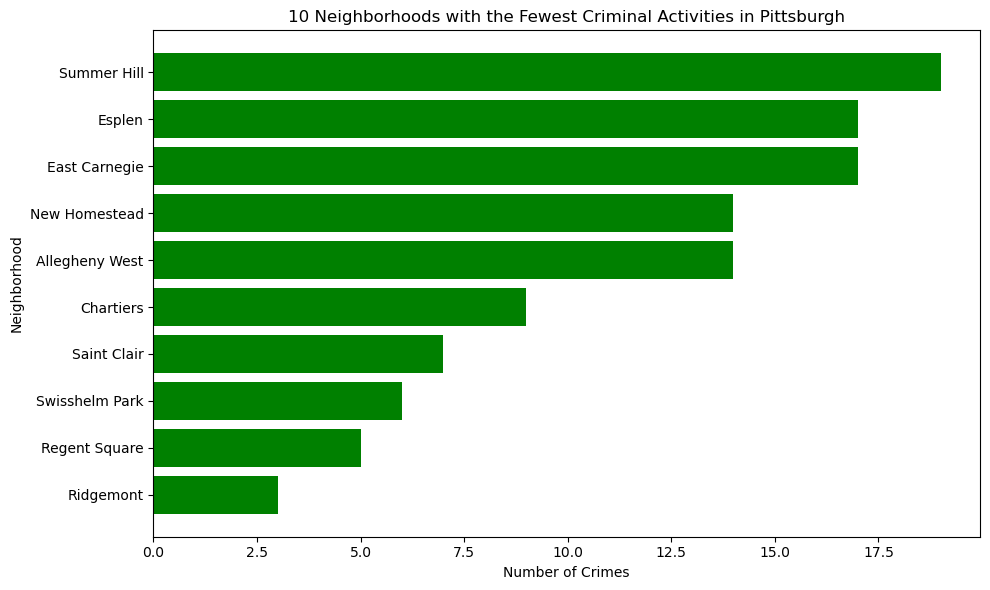

In [7]:
bottom_10 = crime_by_neighborhood.head(10)

plt.figure(figsize=(10,6))
plt.barh(bottom_10['Neighborhood'], bottom_10['Crime_Count'], color='green')
plt.title('10 Neighborhoods with the Fewest Criminal Activities in Pittsburgh')
plt.xlabel('Number of Crimes')
plt.ylabel('Neighborhood')

plt.tight_layout()
plt.show()

# Police arrests
![police](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExa3RxeTMwamRjZ2diN29mcXFnM2RlZWN4cG14MmYwcTViYWhsN2txNiZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/Bc3SkXz1M9mjS/giphy.gif)

The police arrest data set records all arrests done by local or county police departments in the city of
Pittsburgh, there is various types of data recorded in this data set including the arrest date, arrest
time, offense, offense type, and much more. For our evaluation there will be only a few things we need
to focus on: Arrest date, violation, and block address. Keep in mind that this data may not have **all
recorded arrests** and some entries within the data set may have missing or inaccurate data.

## STEP 1

In [9]:
arrests_df = pd.read_csv('policearrest.csv')
print('Preview of dataset:')
arrests_df.head(10)

Preview of dataset:


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
0,1,Adult Arrest-On View,PGHP25000026,b09e1066-c355-cc1b-218c-08dd2a4354ea,2025-01-01,2025.0,Jan,04:04,On-View Arrest (apprehension without a warrant...,21.0,...,Group B,B,18 5503 A1* Disorderly Conduct-Fighting/Threat...,Zone 3,1702.0,South Side Flats,MISDEMEANOR - M3,-79.9824,40.4288,"1600 Block of E Carson Street Pittsburgh, PA"
1,2,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
2,3,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A2II Illegal Park W/I 15 Feet of Fire ...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
3,4,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A3II Illegal Park Where Official Signs...,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
4,5,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Group B,B,75 3353 A1III Illegal Park In Intersection,Zone 3,1702.0,South Side Flats,INFRACTION - S,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
5,6,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,18 6106 A1 Firearms Act-Carrying Firearm W/O L...,Zone 3,1702.0,South Side Flats,FELONY - F3,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
6,7,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,35 780-113 A16 CSDDCA-Possession of a Controll...,Zone 3,1702.0,South Side Flats,MISDEMEANOR,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
7,8,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Property,A,18 3925 A Receiving Stolen Property - Item Tak...,Zone 3,1702.0,South Side Flats,FELONY - F2,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
8,9,Adult Arrest-On View,PGHP25000110,e97f5c84-ddf3-c039-b576-08dd2a41a058,2025-01-01,2025.0,Jan,03:52,On-View Arrest (apprehension without a warrant...,23.0,...,Society,A,35 780-113 A32 CSDDCA-Use/Possession Drug Para...,Zone 3,1702.0,South Side Flats,MISDEMEANOR,-79.9820,40.4298,Intersection of SIDNEY ST./ S. 17TH ST. Pittsb...
9,10,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Group B,B,18 5503 A1 Disorderly Conduct-Fighting/Threate...,Zone 3,2904.0,Carrick,INFRACTION - S,-79.9812,40.3860,"2500 Block of Edgar St. Pittsburgh, PA"


Here we are given a display on the first 10 entries in our data set and a display of what information we are given.
In order to better fit our rule of metric, we will only be **evaluating entries done after the year 2020 and violent crimes
committed, violent crimes in including assault crimes, robbery, homicides, kidnapping, and sexual crimes.**

## STEP 2 Cleaning the arrest data and filtering it to only focus on violent crimes,

In [10]:
arrests_df = arrests_df.dropna(subset=['Neighborhood'])
violent_crimes = [
    "Assault Offenses",
    "Robbery",
    "Homicide Offenses",
    "Kidnapping/Abduction",
    "Sex Offenses",
    "Arson"
]

violent_df = arrests_df[arrests_df['NIBRS_Offense_Category'].isin(violent_crimes)]

print("Total violent crime arrests:", len(violent_df))
violent_df.head()

Total violent crime arrests: 6220


,_id,Template,Case_Number,ArrestPerson_ID,Arrest_Date,Arrest_Year,Arrest_Month,Arrest_Time,Type,ArrestPerson_Age,...,NIBRS_Crime_Against,NIBRS_Offense_Grouping,Violation,Zone,Tract,Neighborhood,ArrestCharge_Felony_Misdemeanor_Description,XCOORD,YCOORD,Block_Address
10,11,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 5104 Resisting Arrest,Zone 3,2904.0,Carrick,MISDEMEANOR - M2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
11,12,Adult Arrest-On View,PGHP24193437,e949b512-2f12-c48e-dc3b-08dd2a317a63,2025-01-01,2025.0,Jan,01:56,On-View Arrest (apprehension without a warrant...,22.0,...,Person,A,18 2702 A3 Aggravated Assault-Injury To Police...,Zone 3,2904.0,Carrick,FELONY - F2,-79.9812,40.386,"2500 Block of Edgar St. Pittsburgh, PA"
13,14,Adult Arrest-On View,PGHP25000021,e8087412-48b6-c2f7-f546-08dd2a3a91ae,2025-01-01,2025.0,Jan,03:01,On-View Arrest (apprehension without a warrant...,41.0,...,Person,A,18 2701 A1 Simple Assault-General,Zone 3,1921.0,Southshore,MISDEMEANOR - M2,-80.0070,40.435,NaN
19,20,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,"18 2701 B1 Simple Assault - Mutual Combatants,...",Zone 5,1208.0,Larimer,MISDEMEANOR - M3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"
20,21,Adult Arrest-On View,PGHP25000147,d5e69282-19d2-c5fb-b9f0-08dd2a5262a0,2025-01-01,2025.0,Jan,05:52,On-View Arrest (apprehension without a warrant...,28.0,...,Person,A,18 2702.1 A2 Assault of Law Enforcement Office...,Zone 5,1208.0,Larimer,FELONY - F3,-79.9177,40.465,"0 Block of Auburn St Pittsburgh, PA"


## STEP 3-Counting violent arrests by neighbourhood

In [11]:
violent_counts = violent_df['Neighborhood'].value_counts().reset_index()
violent_counts.columns = ['Neighborhood', 'Violent_Arrest_Count']
violent_counts = violent_counts.sort_values(by='Violent_Arrest_Count', ascending=True)
violent_counts.head(10)

,Neighborhood,Violent_Arrest_Count
89,Swisshelm Park,1
88,Ridgemont,2
87,Saint Clair,5
86,Chartiers,7
83,East Carnegie,8
84,Allegheny West,8
85,Oakwood,8
81,Polish Hill,9
82,Friendship,9
79,Summer Hill,10


And with all of our metric rules met we are given top 10 cities with the least amount of violent crimes in the
past 5 years. And within the given table, **Swisshelm Park** has be declared the safest city under this metric. This 
neighborhood only has one recorded violent crime that has occured in the past 5 years.

## STEP 4 Visuallize

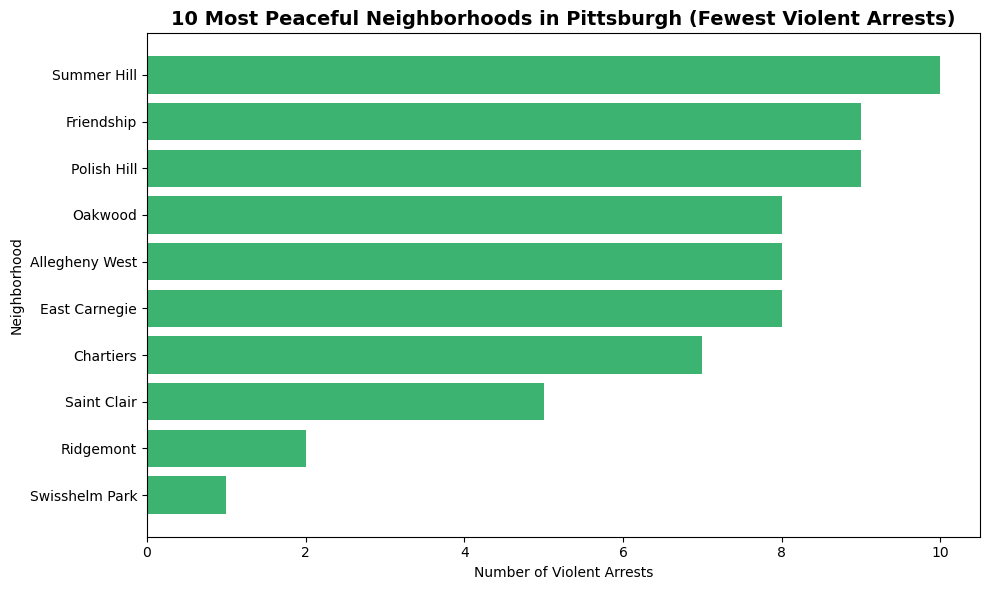

In [12]:
bottom_10 = violent_counts.head(10)

plt.figure(figsize=(10,6))
bars = plt.barh(bottom_10['Neighborhood'], bottom_10['Violent_Arrest_Count'], color='mediumseagreen')

plt.title('10 Most Peaceful Neighborhoods in Pittsburgh (Fewest Violent Arrests)', fontsize=14, fontweight='bold')
plt.xlabel('Number of Violent Arrests')
plt.ylabel('Neighborhood')


plt.tight_layout()
plt.show()


# Weapon Seizures
![Weapon](https://media1.giphy.com/media/v1.Y2lkPTc5MGI3NjExNHUwOXI0M3BqOXFpZ29tOWt2bW11aG92MjNkbDIwbXdrcTcwbWZqZSZlcD12MV9pbnRlcm5hbF9naWZfYnlfaWQmY3Q9Zw/xIytx7kHpq74c/giphy.gif)

Crime and the probability of crime is usually one of the main topics when determing how good a neighborhood is, safety. Using a set data from the Western PA Regional Center (WPRDC) that covers all seziures incidents from 2015 to curret date. We will determine how good a neighborhood is based on which one has the least amount of firearm seizures.

In [13]:
WTake = pd.read_csv("Weaponseizure.csv")
WTake.head(10)

,_id,address,total_count,other_count,pistol_count,revolver_count,rifle_count,shotgun_count,year,month,dow,neighborhood,council_district,ward,tract,public_works_division,police_zone,fire_zone,latitude,longitude
0,1,"1700 BLOCK ARLINGTON AVE PITTSBURGH, PA 15210",2,0,1,1,0,0,2015,1,0,Mount Oliver Borough,3.0,0.0,4.200317e+10,0.0,3,4-6,40.417619,-79.986436
1,2,"BREVET WAY & MINTON ST PITTSBURGH, PA 15204",1,0,1,0,0,0,2015,1,0,Sheraden,2.0,20.0,4.200356e+10,5.0,6,1-16,40.456904,-80.052328
2,3,"TERRACE ST & WHITRIDGE ST PITTSBURGH, PA 15213",1,0,1,0,0,0,2015,1,0,Terrace Village,6.0,4.0,4.200305e+10,3.0,2,2-10,40.441185,-79.968527
3,4,"3500 BLOCK GERBER AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,0,Brighton Heights,1.0,27.0,4.200327e+10,1.0,1,1-14,40.479530,-80.033477
4,5,"7500 BLOCK KELLY ST PITTSBURGH, PA 15208",1,0,1,0,0,0,2015,1,0,NaN,NaN,NaN,NaN,NaN,5,NaN,NaN,NaN
5,6,"1900 BLOCK 5TH AVE PITTSBURGH, PA 15219",1,0,1,0,0,0,2015,1,0,Westwood,2.0,28.0,4.200356e+10,5.0,6,1-18,40.435984,-80.052042
6,7,"400 BLOCK S NEGLEY AVE PITTSBURGH, PA 15232",1,0,1,0,0,0,2015,1,1,East Liberty,9.0,11.0,4.200311e+10,2.0,5,3-8,40.466771,-79.928240
7,8,"5200 BLOCK DRESDEN WAY PITTSBURGH, PA 15201",2,0,2,0,0,0,2015,1,1,Upper Lawrenceville,7.0,10.0,4.200310e+10,2.0,2,3-5,40.480147,-79.954014
8,9,"1100 BLOCK GRAND AVE PITTSBURGH, PA 15212",1,0,1,0,0,0,2015,1,1,Marshall-Shadeland,1.0,27.0,4.200327e+10,1.0,1,1-14,40.474986,-80.027528
9,10,"1600 BLOCK FALLOWFIELD AVE PITTSBURGH, PA 15216",1,0,1,0,0,0,2015,1,1,Beechview,4.0,19.0,4.200319e+10,5.0,6,4-28,40.410487,-80.023969


# Next
Adding our own little statue of limitations, we're going to narrow the list down and not include incidents between 2015 and 2019, and only evaulate incidents that have occured between 2020 and 2025 and count our gray area.

In [14]:
filtered_WTake = WTake[(WTake['year'] >= 2020) & (WTake['year'] <= 2025)].copy()

selected_columns = [
    'year', 
    'neighborhood', 
    'total_count', 
    'pistol_count', 
    'revolver_count', 
    'rifle_count', 
    'shotgun_count',
    'other_count'
]
final_WTake = filtered_WTake[selected_columns]
missing_count = final_WTake['neighborhood'].isna().sum()

print("First 10 incidents (2020-2025) with only selected columns:")
print(final_WTake.head(10))

total_incidents = len(final_WTake)
print(f"\nso far, total number of incidents between 2020 and 2025 is: {total_incidents}")
print(f"And we could not identify the neighborhoods of: {missing_count}")

First 10 incidents (2020-2025) with only selected columns:
      year    neighborhood  total_count  pistol_count  revolver_count  \
2911  2020             NaN            3             3               0   
2912  2020             NaN            1             1               0   
2913  2020  Homewood South            1             1               0   
2914  2020       Brookline            1             0               1   
2915  2020             NaN            1             1               0   
2916  2020             NaN            1             1               0   
2917  2020             NaN            1             0               1   
2918  2020             NaN            1             1               0   
2919  2020       Overbrook            1             1               0   
2920  2020             NaN            1             1               0   

      rifle_count  shotgun_count  other_count  
2911            0              0            0  
2912            0              0         

# Finally
We are going to list the top 10 cities with the lowest amount of gun seizure between the years of 2020 and 2025.

In [15]:
bottom_10_weapons = filtered_WTake.groupby('neighborhood')['total_count'].sum().sort_values(ascending=True).head(10)
bottom_10_WTake = bottom_10_weapons.reset_index()
bottom_10_WTake.columns = ['neighborhood', 'Total Weapons Taken (2020-2025)']

print("Bottom 10 Neighborhoods by Total Weapons Taken (2020-2025):")
print(bottom_10_WTake)

Bottom 10 Neighborhoods by Total Weapons Taken (2020-2025):
           neighborhood  Total Weapons Taken (2020-2025)
0        Allegheny West                                1
1               Bon Air                                1
2        Chartiers City                                1
3         Regent Square                                1
4          West Oakland                                1
5         Spring Garden                                1
6               Oakwood                                2
7  Mount Oliver Borough                                2
8           Polish Hill                                2
9             Fairywood                                2


Now we have a little bit of a tie right now. But, **I have an idea**.
In order to break the tie we're gonna go deeper, and determine ranking
not only by the total number of weapons taken, but the weapons themselves.
We will be ranking this in the following order from least worse to worse:
Revolver - Pistol - Shotgun - Rifle - Other
With the revolver being the least worse and the term "other" being the worse.
(Ya know, because humans are scared of the unknown.)

In [16]:
bottom_10_neighborhoods = [
    'Allegheny West', 'West Oakland', 'Chartiers City', 'Regent Square', 'Bon Air', 
    'Spring Garden', 'Polish Hill', 'Mount Oliver Borough', 'Mt. Oliver', 'Oakwood'
]

bottom_10_data = filtered_WTake[filtered_WTake['neighborhood'].isin(bottom_10_neighborhoods)].copy()
weapon_breakdown = bottom_10_data.groupby('neighborhood').sum().reset_index()


weights = {
    'revolver_count': 1,  # Least Bad
    'pistol_count': 2,
    'shotgun_count': 3,
    'rifle_count': 4,
    'other_count': 5      # Worst
}


weapon_breakdown['Severity_Score'] = (
    weapon_breakdown['revolver_count'] * weights['revolver_count'] +
    weapon_breakdown['pistol_count'] * weights['pistol_count'] +
    weapon_breakdown['shotgun_count'] * weights['shotgun_count'] +
    weapon_breakdown['rifle_count'] * weights['rifle_count'] +
    weapon_breakdown['other_count'] * weights['other_count']
)


ranked_WTake = weapon_breakdown.sort_values(by='Severity_Score', ascending=True).reset_index(drop=True)


final_ranked_WTake = ranked_WTake[[
    'neighborhood', 
    'Severity_Score',
    'revolver_count', 
    'pistol_count', 
    'shotgun_count', 
    'rifle_count', 
    'other_count',
    'total_count'
]]

final_ranked_WTake.columns = [
    'Neighborhood', 
    'Severity Score (Weighted)',
    'Revolver Count (x1)', 
    'Pistol Count (x2)', 
    'Shotgun Count (x3)', 
    'Rifle Count (x4)', 
    'Other Count (x5)',
    'Total Weapons Taken'
]

print("Bottom 10 Neighborhoods Re-Ranked by Weapon Severity (2020-2025):")
print(final_ranked_WTake)

Bottom 10 Neighborhoods Re-Ranked by Weapon Severity (2020-2025):
           Neighborhood  Severity Score (Weighted)  Revolver Count (x1)  \
0        Chartiers City                          1                    1   
1        Allegheny West                          2                    0   
2          West Oakland                          2                    0   
3         Spring Garden                          3                    0   
4           Polish Hill                          4                    0   
5            Mt. Oliver                          4                    0   
6               Oakwood                          4                    0   
7               Bon Air                          5                    0   
8         Regent Square                          5                    0   
9  Mount Oliver Borough                          6                    0   

   Pistol Count (x2)  Shotgun Count (x3)  Rifle Count (x4)  Other Count (x5)  \
0                  0        

**Finally**, with all metric evaluation rules met, we are given our final list of the 10 best cities in Pittsburgh according
to weapon seizures, determined by what city has the lowest amount of dangerous weapons used and seized by local
or county police departments. Although, keep in mind that despite the results according to the data set given. Keep in mind
that the data set used although sourced by an authentic state agency could contain inaccurate data, missing data in entry,
or can be interpreted incorrectly from the circumstance of the actual crime or case.

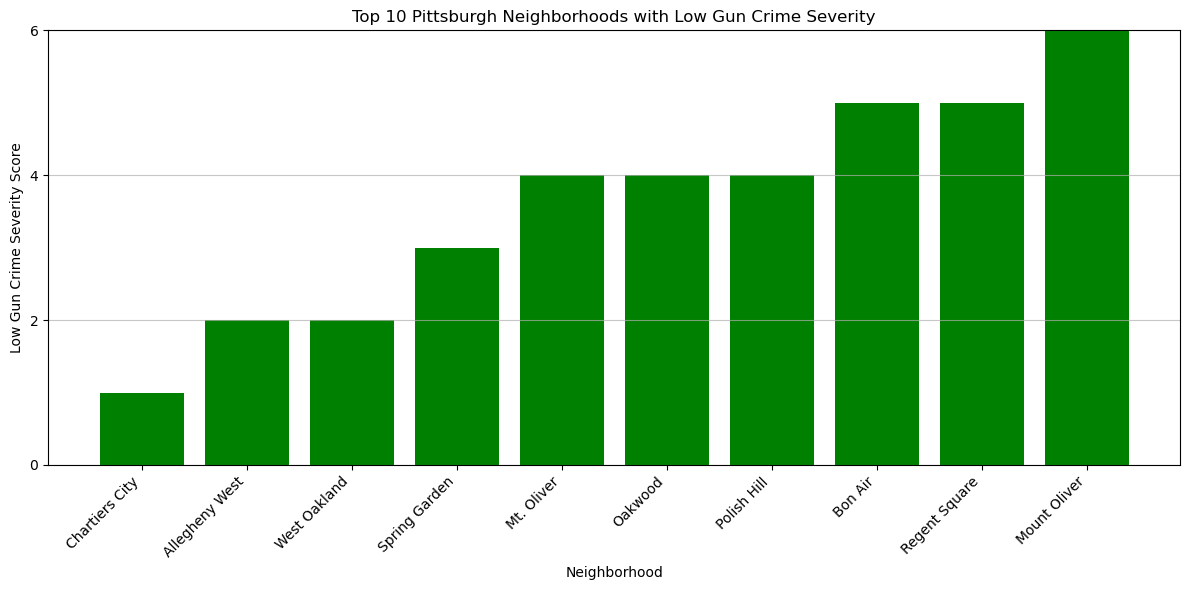

In [17]:
neighborhoods = [
    'Chartiers City',
    'Allegheny West',
    'West Oakland',
    'Spring Garden',
    'Mt. Oliver',
    'Oakwood',
    'Polish Hill',
    'Bon Air',
    'Regent Square',
    'Mount Oliver'
]

severity_scores = [1, 2, 2, 3, 4, 4, 4, 5, 5, 6]

plt.figure(figsize=(12, 6))


plt.bar(neighborhoods, severity_scores, color='green')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Neighborhood')
plt.ylabel('Low Gun Crime Severity Score')
plt.title('Top 10 Pittsburgh Neighborhoods with Low Gun Crime Severity')
plt.yticks(range(0, 7, 2))
plt.ylim(0, 6)

plt.grid(axis='y', linestyle='-', alpha=0.7)

plt.tight_layout()


plt.show()

# THE Best Neighbourhood
![best](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExcGk0dXdycnZqcGw4dmczeXJpaXd1ZTVtYmEyb3h1YmlzcDY3ZTMwbSZlcD12MV9naWZzX3NlYXJjaCZjdD1n/jVStxzak9yk2Q/giphy.gif)

Now that we have analyzed our three datasets, it's time to create a unified measure of neighborhood safety across Pittsburgh.

Lets standardize the column names by removing extra spaces and capitalizing them consistently

In [18]:
crime_by_neighborhood.columns = crime_by_neighborhood.columns.str.strip().str.title()
violent_counts.columns = violent_counts.columns.str.strip().str.title()
weapon_breakdown.columns = weapon_breakdown.columns.str.strip().str.title()

Now, we're going to merge the analyzed datasets on the shared column “Neighborhood.”

In [ ]:
combined = (
    crime_by_neighborhood
    .merge(violent_counts, on='Neighborhood', how='inner')
    .merge(weapon_breakdown, on='Neighborhood', how='inner')
)

combined.head()

Next, we're going to normailze the Key Metrics.

In [ ]:
combined.columns = combined.columns.str.strip().str.title()
for col in ['Crime_Count', 'Violent_Arrest_Count', 'Severity_Score']:
    combined[f'{col}_Norm'] = combined[col].rank(method='min') / len(combined)
    
combined['Peace_Score'] = combined[['Crime_Count_Norm', 'Violent_Arrest_Count_Norm', 'Severity_Score_Norm']].mean(axis=1)


Now that's done, lets calculate the “Peace Score” and rank the neighborhoods

In [31]:
final_rank = combined.sort_values(by='Peace_Score', ascending=True).reset_index(drop=True)
top10 = final_rank.head(10)
best = final_rank.iloc[0]
top10.head()

,Neighborhood,Crime_Count,Violent_Arrest_Count,_Id,Address,Total_Count,Other_Count,Pistol_Count,Revolver_Count,Rifle_Count,...,Public_Works_Division,Police_Zone,Fire_Zone,Latitude,Longitude,Severity_Score,Crime_Count_Norm,Violent_Arrest_Count_Norm,Severity_Score_Norm,Peace_Score
0,Allegheny West,14,8,4601,"800 BLOCK ALLEGHENY AVE PITTSBURGH, PA 15233",1,0,1,0,0,...,1.0,1,1-7,40.450935,-80.018404,2,0.166667,0.166667,0.166667,0.166667
1,Oakwood,20,8,8979,"100 BLOCK BALDWICK RD PITTSBURGH, PA 152052400...",2,0,2,0,0,...,10.0,66,1-191-19,80.854663,-160.122069,4,0.333333,0.166667,0.666667,0.388889
2,Polish Hill,24,9,9283,"1000 BLOCK HERRON AVE PITTSBURGH, PA 15219300 ...",2,0,2,0,0,...,12.0,22,2-62-6,80.914830,-159.933961,4,0.666667,0.500000,0.666667,0.611111
3,Bon Air,21,11,5297,"100 BLOCK REIFERT ST PITTSBURGH, PA 15210",1,1,0,0,0,...,5.0,3,4-7,40.409081,-79.998125,5,0.500000,0.666667,1.000000,0.722222
4,West Oakland,83,43,4856,"5TH AVE & ROBINSON ST PITTSBURGH, PA 15213",1,0,1,0,0,...,3.0,4,2-10,40.437752,-79.965361,2,1.000000,1.000000,0.166667,0.722222


# AND FINALLY 
Lets VISUALIZE 

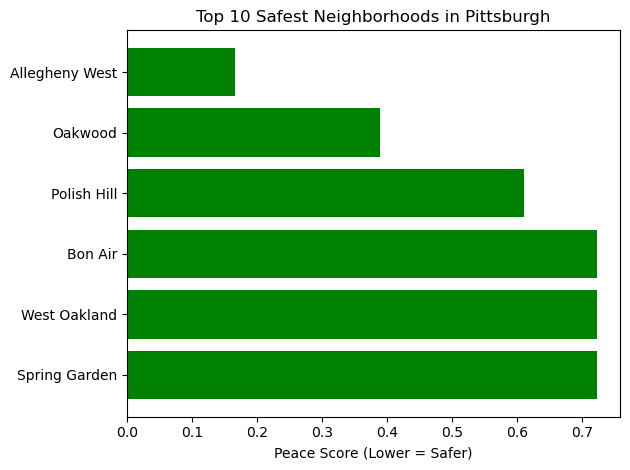

In [24]:
plt.barh(top10['Neighborhood'], top10['Peace_Score'], color='green')
plt.gca().invert_yaxis()
plt.title('Top 10 Safest Neighborhoods in Pittsburgh')
plt.xlabel('Peace Score (Lower = Safer)')
plt.tight_layout()
plt.show()

# THE BEST NEIGHBOuRHOOD IN PITTSBURGH IS...
![Coding meme](https://media.giphy.com/media/v1.Y2lkPTc5MGI3NjExaHhkZDQ3ejhwcnM0cjQzaTE1azRzcWxoMGliM2UydjQwMmJkeXI5ZyZlcD12MV9naWZzX3NlYXJjaCZjdD1n/2Q3BvSwdiy0BOyLkvP/giphy.gif)

In [25]:
print(best['Neighborhood'],
      f"with a Peace Score of {best['Peace_Score']:.3f}!!!")


Allegheny West with a Peace Score of 0.167!!!


# Developer's Conclusion

__Nile Chambers__

Due to me being new to the city of Pittsburgh, and to PA in general as I'm from Washington Capital. It's kind of hard
to give my spin on what Pittsburgh neighborhood is truly my favorite. However with me being a proud of student of the
University of Pittsburgh, I would have to go with the neighborhood of Oakland, Pittsburgh. Oakland from what I have
gotten to learn is a college town, and despite the construction and looking somewhat beat up as if it was in a bad 
part, you can typically see college kids outside the beat up looking townhouses and many times, I can say that I feel safe
walking around Oakland. However crime does still occur, however most cases seen could be expected of a college. A few including
public intoxication, underaged drinking, underaged use of Marijuana, and vanadlism. However, college crimes can get more
intense with many leading to misdemeanor drug use, stalking, or even sexual offense, a category used in our violent crime 
evaluation. However, there has not been any recent news of it but the University has stayed strong on trying to keep it that way.

In comparsion to the winner, Allegheny West. The data provided in our metric evalution has shown little to no crime, with a peace score
under 0.1 across all safety metrics. It seems to be one of the safest neighorhoods with little to no violent crimes occuring, similar to the University of Pittsburgh but on paper. However whether this is truly accurate could be up for debate due to the chance of missing
or inaccurate data even within the data sets used to evaluate the safety metrics. If you want my personal 

**Elda Solomon**

Since I'm also not from here and havent gotten the chance to explore the city, I would say that my favourite neighbourhood is Oakland. From what I've seen, it's pretty safe which is a given considering it's a college town. Though it's not the 'best' neighbourhood according to our analyzed data, we can see that it's still made it into the charts as top 6, assuming that western oakland is a section of oakland.